In [127]:
import os
from skimage.feature import hog
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

dataset_path = r'C:\Users\PARVA\Prodigy_ML_03'

images = []
labels = []

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    if not os.path.isdir(category_path):
        continue

    for file_name in os.listdir(category_path):
        image_path = os.path.join(category_path, file_name)

        if not os.path.isfile(image_path):
            continue

        image = cv2.imread(image_path)
        
        # Check if the image was loaded successfully
        if image is None:
            print(f"Warning: Unable to read image {image_path}. Skipping.")
            continue
        
        # Convert to grayscale and resize
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (64, 64))

        # Extract HOG features
        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

        images.append(features)
        labels.append(category)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Normalize the features
X = X / 255.0

# Check if there are any images collected
if X.size == 0:
    print("Error: No images found. Please check the dataset path.")
else:
    # Flatten the feature array
    X_flatten = X.reshape(X.shape[0], -1)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.2, random_state=42)

    # Set up grid search parameters
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
    }

    # Create SVC model
    svm_model = SVC(random_state=42, probability=True)

    # Perform grid search
    grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)

    # Predictions
    y_pred = grid_search.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Print classification report
    print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))


Error: No images found. Please check the dataset path.


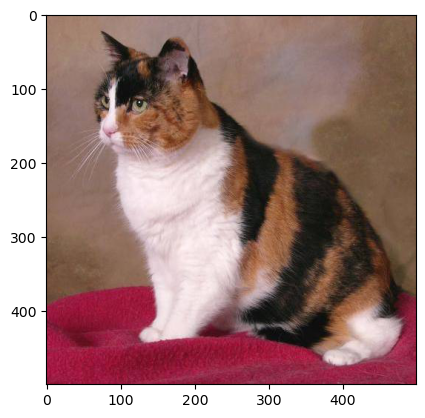

In [128]:
import cv2
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt

def preprocess_image(image_path):

    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = resize(gray_image, (64, 64))

    features, _ = hog(resized_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    features_flatten = features.flatten()

    return features_flatten

image_path = r'C:\Users\PARVA\Prodigy_ML_03\cat.78.jpg'
preprocessed_image = preprocess_image(image_path)
img=imread(image_path)
plt.imshow(img)
plt.show()

reshaped_image = preprocessed_image.reshape(1, -1)
